importing modules

In [7]:
import tensorflow as tf
from tensorflow import keras 
from keras import layers, models 
from keras.datasets import mnist 
from keras.datasets import cifar10
import time
import numpy as np
import matplotlib.pyplot as plt
from keras import regularizers

data manipulation

In [15]:
gpus = tf.config.list_physical_devices('CPU')

if gpus:
    print("Using GPU")
else:
    print("No GPU found, using CPU")

(x_train, y_train), (x_test, y_test) = cifar10.load_data()


x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255


y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)


Using GPU


creating and intializing the netwok model 1

In [16]:
model = models.Sequential(
    [
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(500, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
        layers.Dense(10, activation='softmax', kernel_regularizer=regularizers.l2(0.001))
    ]
)

model.compile(
    optimizer='adam', 
    loss=keras.losses.CategoricalCrossentropy(), 
    metrics=['accuracy'], 
)

model.summary()

history = model.fit(x_train, y_train, epochs=1000, batch_size=1000, validation_split=0.5)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 3072)              0         
                                                                 
 dense_6 (Dense)             (None, 500)               1536500   
                                                                 
 dense_7 (Dense)             (None, 10)                5010      
                                                                 
Total params: 1,541,510
Trainable params: 1,541,510
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
25/25 [==============================] - 2s 48ms/step - loss: 3.8305 - accuracy: 0.1557 - val_loss: 2.8692 - val_accuracy: 0.2438
Epoch 2/1000
25/25 [==============================] - 0s 18ms/step - loss: 2.7100 - accuracy: 0.2803 - val_loss: 2.6075 - val_accuracy: 0.3102
Epoch 3/1000
25/25 [==

evaluating model 1

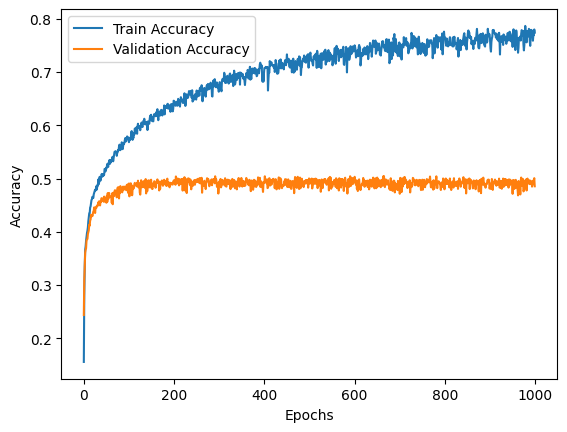

313/313 [==============================] - 1s 4ms/step - loss: 1.9001 - accuracy: 0.4860
Test Loss: 1.9001253843307495
Test Accuracy: 0.4860000014305115


In [17]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

loss,accuracy =model.evaluate(x_test,y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')